In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import plotly_express as px
import plotly.graph_objects as go

import tensorflow as tf


In [96]:
df = pd.read_csv('dataset.csv')


# df.replace(to_replace="STAND2SIT", value="STAND", inplace=True)
df.replace(to_replace="SIT2SLEEP", value="SIT", inplace=True)
df.replace(to_replace="SLEEP2SIT", value="SLEEP", inplace=True)
df.replace(to_replace="SIT2STAND", value="SIT", inplace=True)
df.replace(to_replace="STAND2SLEEP", value="STAND", inplace=True)
df.replace(to_replace="SLEEP2STAND", value="SLEEP", inplace=True)

df.state.unique()

array(['STAND', 'STAND2SIT', 'SIT', 'SLEEP', 'WALK', 'TORIGHT', 'TOLEFT',
       'JUMP', 'UPSTAIRS', 'DOWNSTAIRS'], dtype=object)

In [97]:
fig = go.Figure()
fig.add_trace(go.Trace(y=df['accelerometer_x']))
fig.add_trace(go.Trace(y=df['accelerometer_y']))
fig.add_trace(go.Trace(y=df['accelerometer_z']))
fig.show();

C:\Users\dafaw\anaconda3\envs\Project-Latansa-HAR\lib\site-packages\plotly\graph_objs\_deprecations.py:687: DeprecationWarning:

plotly.graph_objs.Trace is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [98]:
states = df.state

df = df.rolling(window=256).mean()
aa = []
for i in range(0, len(df), 25):
    aa.append(df.iloc[i])
df = pd.DataFrame(aa)
df['state'] = states

for label in ["accelerometer_x", "accelerometer_y", "accelerometer_z", "gyroscope_x", "gyroscope_y", "gyroscope_z"]:
    df[label] = (df[label] - df[label].min()) / (df[label].max() - df[label].min())



C:\Users\dafaw\AppData\Local\Temp/ipykernel_18396/1853534422.py:3: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['state'], dtype='object')



In [99]:
df = df.dropna()
print(df)

       accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
275           0.799164         0.361620         0.072234     0.561750   
300           0.818270         0.280308         0.113960     0.562660   
325           0.837194         0.199024         0.155391     0.563926   
350           0.856477         0.117541         0.196490     0.563836   
375           0.872278         0.059150         0.226559     0.562236   
...                ...              ...              ...          ...   
75850         0.522923         0.070340         0.307933     0.531360   
75875         0.520271         0.077897         0.305274     0.506864   
75900         0.513455         0.078837         0.296523     0.515424   
75925         0.509531         0.052748         0.289766     0.471824   
75950         0.521961         0.071311         0.278910     0.468784   

       gyroscope_y  gyroscope_z  state  
275       0.509310     0.499918  STAND  
300       0.508227     0.503681  STAND  


In [100]:
df.state = df.state.astype('category')
df.state = df.state.cat.codes
df

accelerometer_x  accelerometer_y  accelerometer_z  gyroscope_x  \
275           0.799164         0.361620         0.072234     0.561750   
300           0.818270         0.280308         0.113960     0.562660   
325           0.837194         0.199024         0.155391     0.563926   
350           0.856477         0.117541         0.196490     0.563836   
375           0.872278         0.059150         0.226559     0.562236   
...                ...              ...              ...          ...   
75850         0.522923         0.070340         0.307933     0.531360   
75875         0.520271         0.077897         0.305274     0.506864   
75900         0.513455         0.078837         0.296523     0.515424   
75925         0.509531         0.052748         0.289766     0.471824   
75950         0.521961         0.071311         0.278910     0.468784   

       gyroscope_y  gyroscope_z  state  
275       0.509310     0.499918      4  
300       0.508227     0.503681      4  
325       0.504659     0.507485      4  
350       0.501062     0.511956      4  
375       0.500105     0.515335      4  
...            ...          ...    ...  
75850     0.403700     0.609623      4  
75875     0.357070     0.634697      4  
75900     0.333849     0.681744      4  
75925     0.323969     0.679121      4  
75950     0.315490     0.678052      4  

[3028 rows x 7 columns]

In [101]:

fig = go.Figure()
fig.add_trace(go.Trace(y=df['accelerometer_x']))
fig.add_trace(go.Trace(y=df['accelerometer_y']))
fig.add_trace(go.Trace(y=df['accelerometer_z']))
fig.show();

C:\Users\dafaw\anaconda3\envs\Project-Latansa-HAR\lib\site-packages\plotly\graph_objs\_deprecations.py:687: DeprecationWarning:

plotly.graph_objs.Trace is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [102]:
window_x = []
window_y = []

step = 15
for i in range(0, len(df) - step, step):
    window_x.append(df.iloc[i:i + step])
    window_y.append(df.iloc[i + step]['state'])

window_x = np.array(window_x)
window_y = np.array(window_y)

window_x.shape

(201, 15, 7)

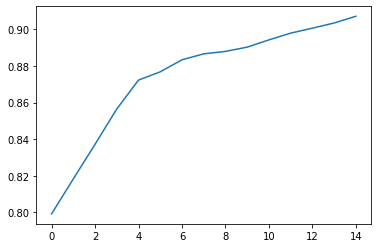

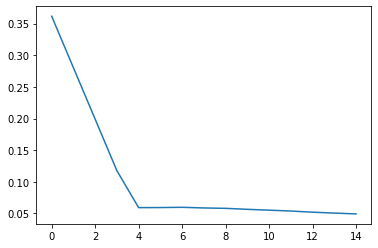

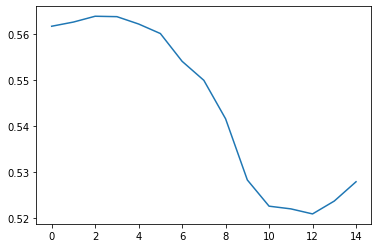

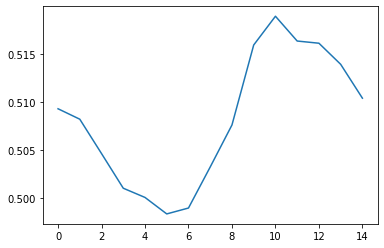

4.0


In [103]:
for i in range(6):
    plt.plot(window_x[0, :, i])
    plt.show()
print(window_y[0])

In [112]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(128, input_shape=(window_x.shape[1], window_x.shape[2])))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

indices = np.arange(len(window_x))
np.random.shuffle(indices)
window_x = window_x[indices]
window_y = window_y[indices]

n_cross_validation = 32
x_train, y_train = window_x[:-n_cross_validation], window_y[:-n_cross_validation]
x_test, y_test = window_x[-n_cross_validation:], window_y[-n_cross_validation:]

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/6 [====>.........................] - ETA: 5s - loss: 2.4507 - accuracy: 0.0312WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000011B8A06E320> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set t